# 05 - Data Search Example: Querying Fibers

## Going from a user defined position to the fiber spectra

To get all fibers within a defined aperture we must first find all shots that *may* contain fibers within that position. Because of the varying and non-contiguous footprint of VIRUS, the search for fibers is a two step process. In this notebook we will show we can go from in input location to all available fiber spectra.

In [1]:
import numpy as np
import tables as tb
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
%run ../survey.py
%run ../shot.py

### Initiate the survey class:

In [16]:
S = Survey('hdr1')

Columns of the survey are now accessible as attributes to the Survey class. And each representative shot astropy coordinate is an attribute: 

In [4]:
S.coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(149.88757,  1.88533 ), (150.48582,  2.48316 ),
     (149.77142,  2.59229 ), ..., (207.99422, 50.933567),
     (214.09381, 51.48942 ), (222.4975 , 50.93349 )]>

The function `get_shotlist()` retrieves all shotids within a defined circular aperture or rectangular region. It operates on the Survey class and requires an astropy coords object as input. If a radius is given, then a circular region is assumed. It can either be an astropy quantity object or otherwise assumed to be in degrees. A rectangular region can be extracted if no radius is given. Both a width and height must be defined in degrees. For example, let's look around the region of our favourite object from a previous tutorial.

### Define your aperture of interest:

In [5]:
coords = SkyCoord(150.025513 * u.deg, 2.087767 * u.deg, frame='icrs')   

To find all shots located in a rectangle 0.5 degrees wide and 0.2 degrees high around the position:

In [17]:
shotlist = S.get_shotlist(coords, width=0.5, height=0.2)

or instead a circular aperture, note that both radius in degrees, arcmin, arcsec can work:

In [18]:
shotlist = S.get_shotlist(coords, radius=10*u.arcmin)
shotlist

array([20170105009, 20170106001, 20170106003, 20170107012, 20171220015,
       20171221016, 20171225015, 20180110021, 20180113013, 20180114013,
       20180120008, 20180123009, 20180124010, 20180209009, 20180210006])

This ones lies within the cosmos repeat field, so we have lots of fibers.

### Initiate the Fibers class object:

In [8]:
fibers = Fibers('20180124v010')

From here, you can either retrieve all fibers within a defined aperture using the query_region Fibers class function (default aperture= 3 arcsec):
  

In [9]:
result_table = fibers.query_region(coords)

Each row in the table contains various info for each fiber, including the ra, dec, multiframe, fiber_num, wavelength, raw spectrum, flux-calibrated spectrum.

In [10]:
result_table.dtype

dtype([('multiframe', 'S20'), ('ra', '<f4'), ('dec', '<f4'), ('Amp2Amp', '<f4', (1036,)), ('Throughput', '<f4', (1036,)), ('amp', 'S2'), ('calfib', '<f4', (1036,)), ('calfibe', '<f4', (1036,)), ('contid', 'S8'), ('error1Dfib', '<f4', (1032,)), ('expnum', '<i4'), ('fiber_to_fiber', '<f4', (1032,)), ('fibnum', '<i4'), ('fpx', '<f4'), ('fpy', '<f4'), ('ifuid', 'S3'), ('ifuslot', 'S3'), ('ifux', '<f4'), ('ifuy', '<f4'), ('obsind', '<i4'), ('sky_subtracted', '<f4', (1032,)), ('specid', 'S3'), ('spectrum', '<f4', (1032,)), ('trace', '<f4', (1032,)), ('twi_spectrum', '<f4', (1032,)), ('wavelength', '<f4', (1032,))])

A user will likely be most interested in the 'wavelength', 'calfib' and 'calfibe' columns as they contain the fiber spectra and associated errors in the spectra.

(3680, 3750)

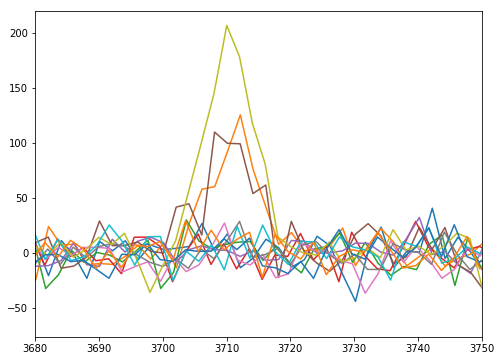

In [11]:
plt.figure(figsize=(8,6))
for row in result_table:
    plt.plot(row['wavelength'], row['sky_subtracted'])
plt.xlim(3680,3750)

We can find the closest fiber to our coordinates above and then plot the 2D data image at that fiber location. 

In [12]:
idx = fibers.get_closest_fiber(coords)
idx

array(6948)

We need to use the Fibers class fuction `get_image_xy` to find out the x,y values for an image.

In [13]:
x, y = fibers.get_image_xy(idx, 3710)

### Plot up an individual fiber spectrum:

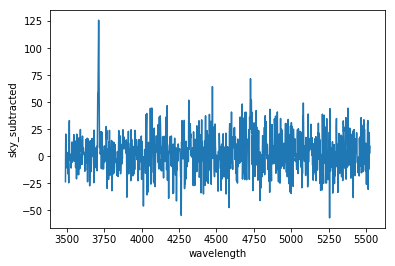

In [14]:
fibers.plot_fiber_spectrum(idx)

### Save a fiber spectrum:

In [19]:
fibers.save_fiber_spectrum(idx, file='spec.dat')